In [1]:
# Best nfl draft predictive model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [2]:
nfl_data = pd.read_excel('C:\\Users\\boydd\\OneDrive\\Documents\\Draft Data.xlsx')

In [3]:
nfl_data.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,AllAmerican,Unanimous,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad
0,1,5,BAL,Jamal Lewis,RB,21,2009.0,1,1,9,...,0,0,0,72.0,240,4.58,23,7.00,37.0,120
1,1,7,ARI,Thomas Jones,RB,22,2011.0,0,1,9,...,1,0,0,70.0,216,4.45,18,7.00,36.0,120
2,1,11,NYG,Ron Dayne,RB,22,2007.0,0,0,1,...,1,1,1,71.0,259,4.65,18,7.25,35.0,118
3,1,19,SEA,Shaun Alexander,RB,23,2008.0,1,3,7,...,0,0,0,72.0,218,4.58,18,7.00,37.0,121
4,1,31,STL,Trung Canidate,RB,23,2003.0,0,0,1,...,0,0,0,71.0,193,4.41,18,7.00,36.0,119


In [4]:
# Linear Regression Model
results = sm.OLS(nfl_data['Pick'], nfl_data[['Age',  'ColYds',  'ColTD',  'ColAtt',  'TeamSkill',  'Heisman',  'AllAmerican',  'Unanimous', 'Doak', 'Ht',   'Wt',  'FortyTime',  'Bench',  '3-Cone',  'Vert',  'Broad' ]]).fit()
print(results.summary())
nfl_data['ypa'] = nfl_data['ColYds'] / nfl_data['ColAtt']

                                 OLS Regression Results                                
Dep. Variable:                   Pick   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              124.5
Date:                Sat, 10 Sep 2022   Prob (F-statistic):                   5.36e-136
Time:                        13:22:34   Log-Likelihood:                         -2053.0
No. Observations:                 377   AIC:                                      4138.
Df Residuals:                     361   BIC:                                      4201.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [5]:
results = sm.OLS(nfl_data['Pick'], nfl_data[['Age',  'ColYds',  'ColTD',  'ColAtt',  'TeamSkill',  'AllAmerican',  'Unanimous', 'Doak', 'Ht',   'Wt',  'FortyTime',  'Bench',  '3-Cone',  'Vert',  'Broad', 'ypa']]).fit()
print(results.summary())

nfl_data['predictions'] = round(results.fittedvalues)
nfl_data.sort_values('predictions')

                                 OLS Regression Results                                
Dep. Variable:                   Pick   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.840
Method:                 Least Squares   F-statistic:                              124.6
Date:                Sat, 10 Sep 2022   Prob (F-statistic):                   4.49e-136
Time:                        13:22:43   Log-Likelihood:                         -2052.8
No. Observations:                 377   AIC:                                      4138.
Df Residuals:                     361   BIC:                                      4200.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad,ypa,predictions
275,2,45,TEN,Derrick Henry,RB,22,2021.0,1,2,3,...,1,75.0,247,4.54,22,7.20,37.0,130,5.617722,-39.0
93,1,2,NOR,Reggie Bush,RB,21,2016.0,0,0,8,...,1,71.0,201,4.37,17,6.80,36.0,123,8.700000,-2.0
107,1,7,MIN,Adrian Peterson,RB,22,2020.0,4,7,12,...,0,73.0,217,4.40,20,7.09,38.5,127,5.678466,2.0
130,3,64,DET,Kevin Smith,RB,21,2012.0,0,0,2,...,0,73.0,217,4.53,18,6.74,32.0,120,5.704444,3.0
257,1,15,SDG,Melvin Gordon,RB,22,2021.0,0,2,6,...,1,73.0,215,4.52,19,7.04,35.0,126,7.542274,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,7,230,NOR,Marcus Murphy,RB,23,2018.0,0,0,0,...,0,68.0,193,4.61,11,7.50,29.0,109,5.220339,219.0
273,7,235,HOU,Kenny Hilliard,RB,23,NaN,0,0,0,...,0,72.0,226,4.83,14,7.17,27.0,111,4.966667,227.0
121,7,246,TAM,Kenneth Darby,RB,24,2010.0,0,0,0,...,0,70.0,211,4.75,19,7.25,30.0,108,3.976190,231.0
335,7,226,DEN,David Williams,RB,24,2018.0,0,0,0,...,0,72.0,224,4.50,18,7.55,30.5,114,5.606838,231.0


In [6]:
# Robust Regression
from sklearn.linear_model import HuberRegressor
X = nfl_data[['Age', 'ColYds', 'ColTD', 'ColAtt', 'TeamSkill', 'Heisman', 'AllAmerican', 'Unanimous', 'Doak', 'Ht', 'Wt', 'FortyTime', 'Bench', '3-Cone', 'Vert', 'Broad', 'ypa']].copy()
y = nfl_data['Pick'].copy()

In [7]:
huber = HuberRegressor().fit(X, y)
huber.score(X, y)

C:\Users\boydd\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.3231406709386079

In [8]:
pred = huber.predict(X)

In [9]:
nfl_data['Huber Pred'] = pred

In [10]:
nfl_data.sort_values('Huber Pred')

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad,ypa,predictions,Huber Pred
365,2,55,BAL,J.K. Dobbins,RB,21,2020.0,0,0,0,...,69.0,209,4.45,23,7.05,43.0,125,6.654485,18.0,-35.552530
275,2,45,TEN,Derrick Henry,RB,22,2021.0,1,2,3,...,75.0,247,4.54,22,7.20,37.0,130,5.617722,-39.0,-32.406830
198,1,3,CLE,Trent Richardson,RB,22,2014.0,0,0,3,...,69.0,228,4.48,29,6.80,38.0,127,5.932862,10.0,-18.595274
257,1,15,SDG,Melvin Gordon,RB,22,2021.0,0,2,6,...,73.0,215,4.52,19,7.04,35.0,126,7.542274,3.0,-4.090032
2,1,11,NYG,Ron Dayne,RB,22,2007.0,0,0,1,...,71.0,259,4.65,18,7.25,35.0,118,6.035608,34.0,-1.887909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,6,204,NYJ,Trenton Cannon,RB,24,2021.0,0,0,0,...,70.0,185,4.40,13,7.02,38.5,129,6.552000,182.0,223.607809
89,6,201,ATL,DeAndra Cobb,RB,24,2005.0,0,0,0,...,70.0,196,4.49,17,7.13,34.0,118,7.583333,215.0,231.545644
17,7,252,GNB,Rondell Mealey,RB,23,2002.0,0,0,0,...,72.0,212,4.69,17,6.90,33.0,120,3.747059,209.0,233.456388
335,7,226,DEN,David Williams,RB,24,2018.0,0,0,0,...,72.0,224,4.50,18,7.55,30.5,114,5.606838,231.0,248.649952


In [11]:
# Transformed pick model
nfl_data['Sqrt pick'] = np.sqrt(nfl_data['Pick'])

In [12]:
nfl_data.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Wt,FortyTime,Bench,3-Cone,Vert,Broad,ypa,predictions,Huber Pred,Sqrt pick
0,1,5,BAL,Jamal Lewis,RB,21,2009.0,1,1,9,...,240,4.58,23,7.00,37.0,120,5.879310,55.0,15.725185,2.236068
1,1,7,ARI,Thomas Jones,RB,22,2011.0,0,1,9,...,216,4.45,18,7.00,36.0,120,5.383234,80.0,89.086566,2.645751
2,1,11,NYG,Ron Dayne,RB,22,2007.0,0,0,1,...,259,4.65,18,7.25,35.0,118,6.035608,34.0,-1.887909,3.316625
3,1,19,SEA,Shaun Alexander,RB,23,2008.0,1,3,7,...,218,4.58,18,7.00,37.0,121,4.579470,93.0,107.623912,4.358899
4,1,31,STL,Trung Canidate,RB,23,2003.0,0,0,1,...,193,4.41,18,7.00,36.0,119,6.332016,132.0,142.561099,5.567764


In [13]:
TransformedModel = sm.OLS(nfl_data['Sqrt pick'], nfl_data[['Age',  'ColYds',  'ColTD',  'ColAtt',  'TeamSkill',  'Heisman',  'AllAmerican',  'Unanimous', 'Doak', 'Ht',   'Wt',  'FortyTime',  'Bench',  '3-Cone',  'Vert',  'Broad', 'ypa' ]]).fit()
print(TransformedModel.summary())
# Highest R2

                                 OLS Regression Results                                
Dep. Variable:              Sqrt pick   R-squared (uncentered):                   0.939
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              325.9
Date:                Sat, 10 Sep 2022   Prob (F-statistic):                   1.03e-206
Time:                        13:23:07   Log-Likelihood:                         -915.28
No. Observations:                 377   AIC:                                      1865.
Df Residuals:                     360   BIC:                                      1931.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [14]:
print(TransformedModel.fittedvalues)
nfl_data['Transformed Predictions'] = TransformedModel.fittedvalues ** 2

0       6.808417
1       7.957867
2       4.831007
3       9.066526
4      10.917031
         ...    
372    14.514547
373    12.939961
374    12.364846
375    11.697661
376    13.314816
Length: 377, dtype: float64


In [15]:
nfl_data['Transformed Predictions']
nfl_data.sort_values('Transformed Predictions')
# VERY GOOD

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,FortyTime,Bench,3-Cone,Vert,Broad,ypa,predictions,Huber Pred,Sqrt pick,Transformed Predictions
275,2,45,TEN,Derrick Henry,RB,22,2021.0,1,2,3,...,4.54,22,7.20,37.0,130,5.617722,-39.0,-32.406830,6.708204,1.630418
93,1,2,NOR,Reggie Bush,RB,21,2016.0,0,0,8,...,4.37,17,6.80,36.0,123,8.700000,-2.0,14.353504,1.414214,5.781623
363,2,41,IND,Jonathan Taylor,RB,21,2021.0,0,0,1,...,4.39,17,7.01,34.5,123,6.259375,6.0,2.591421,6.403124,11.317099
107,1,7,MIN,Adrian Peterson,RB,22,2020.0,4,7,12,...,4.40,20,7.09,38.5,127,5.678466,2.0,23.696709,2.645751,14.778490
257,1,15,SDG,Melvin Gordon,RB,22,2021.0,0,2,6,...,4.52,19,7.04,35.0,126,7.542274,3.0,-4.090032,3.872983,15.720961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,7,230,NOR,Marcus Murphy,RB,23,2018.0,0,0,0,...,4.61,11,7.50,29.0,109,5.220339,219.0,188.743385,15.165751,237.305315
273,7,235,HOU,Kenny Hilliard,RB,23,NaN,0,0,0,...,4.83,14,7.17,27.0,111,4.966667,227.0,219.913519,15.329710,252.786830
335,7,226,DEN,David Williams,RB,24,2018.0,0,0,0,...,4.50,18,7.55,30.5,114,5.606838,231.0,248.649952,15.033296,257.161393
121,7,246,TAM,Kenneth Darby,RB,24,2010.0,0,0,0,...,4.75,19,7.25,30.0,108,3.976190,231.0,212.979419,15.684387,259.760759


In [16]:
# Try a transformed Robust Regression
TX = nfl_data[['Age', 'ColYds', 'ColTD', 'ColAtt', 'TeamSkill', 'Heisman', 'AllAmerican', 'Unanimous', 'Doak', 'Ht', 'Wt', 'FortyTime', 'Bench', '3-Cone', 'Vert', 'Broad', 'ypa']].copy()
Ty = nfl_data['Sqrt pick'].copy()

In [17]:
huber2 = HuberRegressor().fit(TX, Ty)
huber2.score(TX, Ty)
pred2 = huber2.predict(X)
nfl_data['Huber TrPred'] = pred2 ** 2
nfl_data.sort_values('Huber TrPred')

C:\Users\boydd\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Bench,3-Cone,Vert,Broad,ypa,predictions,Huber Pred,Sqrt pick,Transformed Predictions,Huber TrPred
275,2,45,TEN,Derrick Henry,RB,22,2021.0,1,2,3,...,22,7.20,37.0,130,5.617722,-39.0,-32.406830,6.708204,1.630418,8.455377
365,2,55,BAL,J.K. Dobbins,RB,21,2020.0,0,0,0,...,23,7.05,43.0,125,6.654485,18.0,-35.552530,7.416198,24.403142,11.172364
257,1,15,SDG,Melvin Gordon,RB,22,2021.0,0,2,6,...,19,7.04,35.0,126,7.542274,3.0,-4.090032,3.872983,15.720961,17.029359
2,1,11,NYG,Ron Dayne,RB,22,2007.0,0,0,1,...,18,7.25,35.0,118,6.035608,34.0,-1.887909,3.316625,23.338626,17.848263
363,2,41,IND,Jonathan Taylor,RB,21,2021.0,0,0,1,...,17,7.01,34.5,123,6.259375,6.0,2.591421,6.403124,11.317099,18.287180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,5,159,PIT,Chris Rainey,RB,24,2013.0,0,0,0,...,16,6.50,36.5,120,5.035088,193.0,222.680883,12.609520,189.859966,244.400873
17,7,252,GNB,Rondell Mealey,RB,23,2002.0,0,0,0,...,17,6.90,33.0,120,3.747059,209.0,233.456388,15.874508,227.836697,252.935861
89,6,201,ATL,DeAndra Cobb,RB,24,2005.0,0,0,0,...,17,7.13,34.0,118,7.583333,215.0,231.545644,14.177447,229.068825,265.687527
238,7,253,NYG,Michael Cox,RB,24,2014.0,0,0,0,...,13,6.87,41.0,131,3.585859,205.0,250.411989,15.905974,215.470571,279.192282


In [18]:
print(huber2.score(TX, Ty))

0.3758122167268918


In [21]:
draftData22 = pd.read_excel("C:\\Users\\boydd\\OneDrive\\Documents\\Draft2022.xlsx")

In [24]:
draftData22 = draftData22.drop(['Rnd', 'Pick'], axis=1)

In [25]:
draftData22.head()

,Player,Pos,Age,From,College,ColYds,ColAtt,ColTD,TeamSkill,Heisman,AllAmerican,Unanimous,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad
0,Isaiah Spiller,RB,20,2022,Texas A&M,1011,179,6,4,0,0,0,0,72,217,4.63,16,6.83,30.0,114
1,Breece Hall,RB,21,2022,Iowa State,1472,253,20,3,0,2,1,0,71,217,4.39,16,6.80,40.0,126
2,Kenneth Walker III,RB,21,2022,Michigan St,1646,264,18,5,0,1,1,1,69,211,4.38,19,7.10,34.0,122
3,Rachaad White,RB,23,2022,Arizona St,1000,182,15,4,0,0,0,0,72,214,4.48,16,7.12,38.0,125
4,Jerrion Ealy,RB,21,2022,Ole Miss,770,133,5,5,0,0,0,0,69,185,4.52,14,7.10,34.5,128


In [28]:
draftData22ColsForModel = draftData22.drop(['Player', 'Pos', 'College', 'ColTD'], axis=1)

In [29]:
draftData22ColsForModel['ypa'] = draftData22ColsForModel['ColYds'] / draftData22ColsForModel['ColAtt']

In [30]:
draftData22ColsForModel.head()

,Age,From,ColYds,ColAtt,TeamSkill,Heisman,AllAmerican,Unanimous,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad,ypa
0,20,2022,1011,179,4,0,0,0,0,72,217,4.63,16,6.83,30.0,114,5.648045
1,21,2022,1472,253,3,0,2,1,0,71,217,4.39,16,6.80,40.0,126,5.818182
2,21,2022,1646,264,5,0,1,1,1,69,211,4.38,19,7.10,34.0,122,6.234848
3,23,2022,1000,182,4,0,0,0,0,72,214,4.48,16,7.12,38.0,125,5.494505
4,21,2022,770,133,5,0,0,0,0,69,185,4.52,14,7.10,34.5,128,5.789474


In [31]:
draftData22ColsForModel['SqrtPred'] = TransformedModel.predict(draftData22ColsForModel)

In [33]:
draftData22ColsForModel['Pred1'] = draftData22ColsForModel['SqrtPred'] ** 2

In [34]:
draftData22ColsForModel.head()

,Age,From,ColYds,ColAtt,TeamSkill,Heisman,AllAmerican,Unanimous,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad,ypa,SqrtPred,Pred1
0,20,2022,1011,179,4,0,0,0,0,72,217,4.63,16,6.83,30.0,114,5.648045,12.231493,149.609428
1,21,2022,1472,253,3,0,2,1,0,71,217,4.39,16,6.80,40.0,126,5.818182,9.747150,95.006930
2,21,2022,1646,264,5,0,1,1,1,69,211,4.38,19,7.10,34.0,122,6.234848,11.663840,136.045166
3,23,2022,1000,182,4,0,0,0,0,72,214,4.48,16,7.12,38.0,125,5.494505,13.222482,174.834027
4,21,2022,770,133,5,0,0,0,0,69,185,4.52,14,7.10,34.5,128,5.789474,12.933734,167.281462


In [35]:
draftData22['Pred1'] = draftData22ColsForModel['Pred1']

In [37]:
draftData22.sort_values(['Pred1'])

,Player,Pos,Age,From,College,ColYds,ColAtt,ColTD,TeamSkill,Heisman,...,Unanimous,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad,Pred1
24,Master Teague,RB,22,2022,Ohio State,880,120,7,5,0,...,0,0,71,225,4.44,27,6.95,36.0,131,94.598809
1,Breece Hall,RB,21,2022,Iowa State,1472,253,20,3,0,...,1,0,71,217,4.39,16,6.80,40.0,126,95.006930
14,Zamir White,RB,22,2022,Georgia,856,160,11,6,0,...,0,0,72,215,4.40,16,7.12,33.5,128,108.899930
22,Hassan Haskins,RB,22,2022,Michigan,1327,270,20,6,0,...,0,0,73,220,4.60,27,7.20,33.0,117,127.514537
2,Kenneth Walker III,RB,21,2022,Michigan St,1646,264,18,5,0,...,1,1,69,211,4.38,19,7.10,34.0,122,136.045166
17,Brian Robinson Jr,RB,22,2022,Alabama,1336,270,14,6,0,...,0,0,73,228,4.53,19,7.33,30.0,118,140.966344
13,James Cook,RB,23,2022,Georgia,728,113,7,6,0,...,0,0,71,199,4.42,15,7.07,33.0,124,142.221449
0,Isaiah Spiller,RB,20,2022,Texas A&M,1011,179,6,4,0,...,0,0,72,217,4.63,16,6.83,30.0,114,149.609428
12,Tyrion Davis-Price,RB,21,2022,LSU,1004,211,6,3,0,...,0,0,73,223,4.48,18,7.20,35.0,117,156.212380
4,Jerrion Ealy,RB,21,2022,Ole Miss,770,133,5,5,0,...,0,0,69,185,4.52,14,7.10,34.5,128,167.281462


In [39]:
draftData22ColsForModel.head()

,Age,From,ColYds,ColAtt,TeamSkill,Heisman,AllAmerican,Unanimous,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad,ypa,SqrtPred,Pred1
0,20,2022,1011,179,4,0,0,0,0,72,217,4.63,16,6.83,30.0,114,5.648045,12.231493,149.609428
1,21,2022,1472,253,3,0,2,1,0,71,217,4.39,16,6.80,40.0,126,5.818182,9.747150,95.006930
2,21,2022,1646,264,5,0,1,1,1,69,211,4.38,19,7.10,34.0,122,6.234848,11.663840,136.045166
3,23,2022,1000,182,4,0,0,0,0,72,214,4.48,16,7.12,38.0,125,5.494505,13.222482,174.834027
4,21,2022,770,133,5,0,0,0,0,69,185,4.52,14,7.10,34.5,128,5.789474,12.933734,167.281462


In [44]:
draftData22Huber = draftData22.drop(['Player', 'Pos', 'College', 'From', 'Pred1', 'HuberPred'], axis=1)
draftData22Huber['ypa'] = draftData22Huber['ColYds'] / draftData22Huber['ColAtt']

In [45]:
draftData22['HuberPred'] = huber2.predict(draftData22Huber)

C:\Users\boydd\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [47]:
draftData22['HuberPred'] = draftData22['HuberPred'] ** 2

In [50]:
draftData22 = draftData22.sort_values('HuberPred')

In [51]:
draftData22.head()

,Player,Pos,Age,From,College,ColYds,ColAtt,ColTD,TeamSkill,Heisman,...,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad,Pred1,HuberPred
2,Kenneth Walker III,RB,21,2022,Michigan St,1646,264,18,5,0,...,1,69,211,4.38,19,7.10,34.0,122,136.045166,45.820810
22,Hassan Haskins,RB,22,2022,Michigan,1327,270,20,6,0,...,0,73,220,4.60,27,7.20,33.0,117,127.514537,61.486800
17,Brian Robinson Jr,RB,22,2022,Alabama,1336,270,14,6,0,...,0,73,228,4.53,19,7.33,30.0,118,140.966344,71.555922
1,Breece Hall,RB,21,2022,Iowa State,1472,253,20,3,0,...,0,71,217,4.39,16,6.80,40.0,126,95.006930,77.627506
19,Tyler Allgeier,RB,22,2022,BYU,1606,276,23,4,0,...,0,71,220,4.60,21,7.09,33.0,120,207.958095,83.164016


In [65]:
draftData22['Rank'] = np.arange(len(draftData22))

In [67]:
draftData22['Rank'] = draftData22['Rank'] + 1

In [70]:
print(draftData22[['Player', 'College', 'Rank']])

                Player          College  Rank
2   Kenneth Walker III      Michigan St     1
22      Hassan Haskins         Michigan     2
17   Brian Robinson Jr          Alabama     3
1          Breece Hall       Iowa State     4
19      Tyler Allgeier              BYU     5
24       Master Teague       Ohio State     6
0       Isaiah Spiller        Texas A&M     7
23         Abram Smith           Baylor     8
5       Kyren Williams       Notre Dame     9
14         Zamir White          Georgia    10
20   Sincere McCormick             UTSA    11
11       Tyler Goodson             Iowa    12
28         Tyler Badie         Missouri    13
12  Tyrion Davis-Price              LSU    14
33       Jaylen Warren      Oklahoma St    15
4         Jerrion Ealy         Ole Miss    16
18          CJ Verdell           Oregon    17
21         Jerome Ford       Cincinnati    18
26        Kevin Harris   South Carolina    19
6       Zonovan Knight         NC State    20
9         Leddie Brown    West Vir

In [79]:
def Rnd_Column(row):
    if row['HuberPred'] <=32:
        return 1
    elif row['HuberPred'] <=64:
        return 2
    elif row['HuberPred'] <= 96:
        return 3
    elif row['HuberPred'] <= 128:
        return 4
    elif row['HuberPred'] <=160:
        return 5
    elif row['HuberPred'] <=192:
        return 6
    elif row['HuberPred'] <= 224:
        return 7
    else:
        return 'UFA'

In [80]:
draftData22['HuberRnd'] = draftData22.apply(Rnd_Column, axis=1)

In [81]:
draftData22.head()

,Player,Pos,Age,From,College,ColYds,ColAtt,ColTD,TeamSkill,Heisman,...,Wt,FortyTime,Bench,3-Cone,Vert,Broad,Pred1,HuberPred,Rank,HuberRnd
2,Kenneth Walker III,RB,21,2022,Michigan St,1646,264,18,5,0,...,211,4.38,19,7.10,34.0,122,136.045166,45.820810,1,2
22,Hassan Haskins,RB,22,2022,Michigan,1327,270,20,6,0,...,220,4.60,27,7.20,33.0,117,127.514537,61.486800,2,2
17,Brian Robinson Jr,RB,22,2022,Alabama,1336,270,14,6,0,...,228,4.53,19,7.33,30.0,118,140.966344,71.555922,3,3
1,Breece Hall,RB,21,2022,Iowa State,1472,253,20,3,0,...,217,4.39,16,6.80,40.0,126,95.006930,77.627506,4,3
19,Tyler Allgeier,RB,22,2022,BYU,1606,276,23,4,0,...,220,4.60,21,7.09,33.0,120,207.958095,83.164016,5,3


In [82]:
import seaborn as sns

<AxesSubplot:xlabel='HuberPred', ylabel='ColYds'>

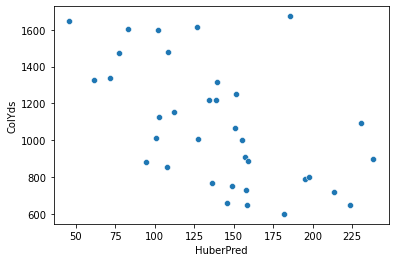

In [83]:
sns.scatterplot(data=draftData22, x='HuberPred', y='ColYds')

In [84]:
print(draftData22[['Player', 'College', 'Rank', 'HuberPred', 'HuberRnd']])

                Player          College  Rank   HuberPred HuberRnd
2   Kenneth Walker III      Michigan St     1   45.820810        2
22      Hassan Haskins         Michigan     2   61.486800        2
17   Brian Robinson Jr          Alabama     3   71.555922        3
1          Breece Hall       Iowa State     4   77.627506        3
19      Tyler Allgeier              BYU     5   83.164016        3
24       Master Teague       Ohio State     6   94.826572        3
0       Isaiah Spiller        Texas A&M     7  100.627635        4
23         Abram Smith           Baylor     8  102.182339        4
5       Kyren Williams       Notre Dame     9  102.717112        4
14         Zamir White          Georgia    10  107.778755        4
20   Sincere McCormick             UTSA    11  108.631749        4
11       Tyler Goodson             Iowa    12  112.046064        4
28         Tyler Badie         Missouri    13  126.717367        4
12  Tyrion Davis-Price              LSU    14  127.325534     

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

In [91]:
GBR = GradientBoostingRegressor()

In [92]:
GBR.fit(X, y)

GradientBoostingRegressor()

In [93]:
nfl_data['GBR Preds'] = GBR.predict(X)

In [94]:
nfl_data.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,3-Cone,Vert,Broad,ypa,predictions,Huber Pred,Sqrt pick,Transformed Predictions,Huber TrPred,GBR Preds
0,1,5,BAL,Jamal Lewis,RB,21,2009.0,1,1,9,...,7.00,37.0,120,5.879310,55.0,15.725185,2.236068,46.354538,39.877329,22.145418
1,1,7,ARI,Thomas Jones,RB,22,2011.0,0,1,9,...,7.00,36.0,120,5.383234,80.0,89.086566,2.645751,63.327641,77.203303,28.260899
2,1,11,NYG,Ron Dayne,RB,22,2007.0,0,0,1,...,7.25,35.0,118,6.035608,34.0,-1.887909,3.316625,23.338626,17.848263,3.372989
3,1,19,SEA,Shaun Alexander,RB,23,2008.0,1,3,7,...,7.00,37.0,121,4.579470,93.0,107.623912,4.358899,82.201886,90.792731,67.456496
4,1,31,STL,Trung Canidate,RB,23,2003.0,0,0,1,...,7.00,36.0,119,6.332016,132.0,142.561099,5.567764,119.181565,138.356293,78.315369


In [95]:
score_1 = metrics.r2_score(y, nfl_data['GBR Preds'])

In [96]:
score_1

0.8096466726053303

In [97]:
# Different scores
score_2 = metrics.r2_score(y, nfl_data['Transformed Predictions'])
score_3 = metrics.r2_score(y, nfl_data['Huber TrPred'])

In [98]:
print(score_1, '\n', score_2, '\n', score_3, '\n')

0.8096466726053303 
 0.38508675487573574 
 0.31456270792459606 



In [99]:
# GBR has the highest r2
GBR_Preds = GBR.predict(draftData22Huber)

C:\Users\boydd\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [100]:
GBR_Preds

array([141.36314261, 144.56109197, 138.28991837, 201.52068349,
       151.9901171 , 181.0346325 , 163.94129684, 161.89563726,
       156.44587299, 148.60323925, 169.96853451, 153.66619856,
       163.38285377, 108.32959739, 106.34212245, 167.47095267,
       150.66472514,  95.82610204, 166.63755019, 137.89726821,
       179.84972838, 196.04687239,  99.98027519, 135.65003313,
        94.67715641, 196.94635544, 148.0292278 , 122.46324992,
       133.73395466, 159.62964438, 219.2707551 , 131.2597629 ,
       149.04683908, 185.62170773, 162.37362856])

In [101]:
from sklearn.model_selection import train_test_split


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [104]:
GBR2 = GradientBoostingRegressor()
GBR2.fit(X_train, y_train)

GradientBoostingRegressor()

In [106]:
X_preds = X_train.copy()
X_preds['GBR2'] = GBR2.predict(X_train)

In [107]:
X_preds.head()

,Age,ColYds,ColTD,ColAtt,TeamSkill,Heisman,AllAmerican,Unanimous,Doak,Ht,Wt,FortyTime,Bench,3-Cone,Vert,Broad,ypa,GBR2
177,21,1697,17,281,3,0,0,0,0,72.0,227,4.56,21,6.82,38.0,122,6.039146,72.992317
128,22,2127,23,361,2,0,0,0,0,73.0,217,4.44,23,6.84,33.0,118,5.891967,44.611046
92,23,1381,14,274,3,0,0,0,0,71.0,224,4.60,17,6.95,31.0,108,5.040146,206.677179
327,21,1117,14,209,5,0,0,0,0,69.0,202,4.60,18,7.30,31.5,118,5.344498,150.816976
366,22,1685,14,318,3,0,0,0,0,72.0,247,4.53,23,7.19,41.0,131,5.298742,77.108019


In [108]:
train_score = metrics.r2_score(y_train, X_preds['GBR2'])

In [109]:
train_score

0.8720269918249812

In [110]:
test_preds = GBR2.predict(X_test)

In [111]:
test_score = metrics.r2_score(y_test, test_preds)

In [112]:
test_score

0.3278905361971076

In [ ]:
# A lot of overfitting